In [1]:
import numpy as np

In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('Placement.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [9]:
import matplotlib.pyplot as plt


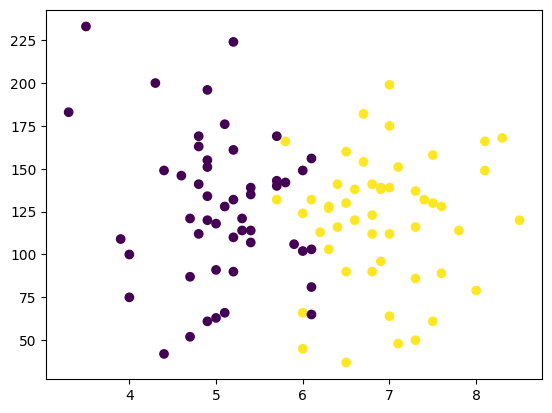

In [12]:
plt.scatter(df['CGPA'], df['IQ'], c = df['Placement'])

In [13]:
X = df.iloc[:,0:2]

In [14]:
Y = df.iloc[:,-1]

In [15]:
X

,Student_ID,CGPA
0,1,6.8
1,2,5.9
2,3,5.3
3,4,7.4
4,5,5.8
...,...,...
95,96,4.3
96,97,4.4
97,98,6.7
98,99,6.3


In [16]:
Y

,Placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)


In [20]:
X_train

,Student_ID,CGPA
50,51,3.5
38,39,6.5
62,63,6.0
93,94,6.8
85,86,5.8
...,...,...
37,38,8.1
40,41,4.9
45,46,6.0
82,83,6.5


In [21]:
Y_train

,Placement
50,0
38,1
62,0
93,1
85,1
...,...
37,1
40,0
45,1
82,1


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_train

array([[ 0.05281109, -2.19764134],
       [-0.35458875,  0.51922295],
       [ 0.46021093,  0.06641224],
       [ 1.51266053,  0.79090938],
       [ 1.24106063, -0.11471205],
       [-1.33913837, -0.74864705],
       [-0.59223866, -1.83539277],
       [-0.04903887, -0.65808491],
       [ 1.20711064, -0.20527419],
       [ 1.37686058, -0.92977134],
       [-0.45643871,  0.79090938],
       [-1.06753848, -2.37876563],
       [-1.16938844,  0.15697438],
       [ 1.44476055,  1.42484439],
       [ 1.71636045,  0.24753652],
       [-0.82988857, -1.11089562],
       [-1.57678828, -0.56752276],
       [-1.64468825,  0.79090938],
       [ 0.66391085, -1.74483063],
       [ 0.42626095,  1.2437201 ],
       [-1.44098833, -0.20527419],
       [-0.2187888 ,  1.51540653],
       [-1.03358849, -1.74483063],
       [-1.2712384 ,  0.88147153],
       [ 0.25651101,  0.15697438],
       [-1.20333842,  0.42866081],
       [ 1.64846047,  0.70034724],
       [ 1.68241046,  0.33809867],
       [ 1.17316066,

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [30]:
clf.fit(X_train, Y_train) #training

LogisticRegression()

In [31]:
#evaluate

In [38]:
Y_pred = clf.predict(X_test)

In [33]:
Y_test

,Placement
80,0
65,1
39,0
60,1
23,0
77,1
32,1
90,1
58,1
66,1


In [35]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(Y_test, Y_pred)

1.0

<Axes: >

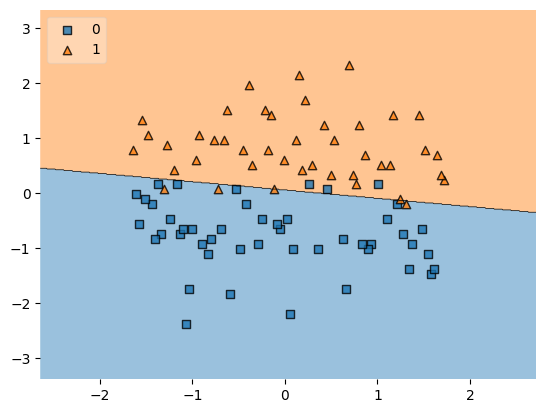

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf = clf, legend = 2)

In [42]:
import pickle

In [43]:
pickle.dump(clf, open('model.pkl', 'wb'))